# Generate a Carnatic music composition with an LSTM Network


In [1]:
import IPython
import sys
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#from music21 import *
#from grammar import *
#from qa import *
#from preprocess import * 
#from music_utils import *
#from data_utils import *
#from outputs import *
#from test_utils import *

from tensorflow.keras.layers import Dense, Activation, Dropout, Input, LSTM, Reshape, Lambda, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

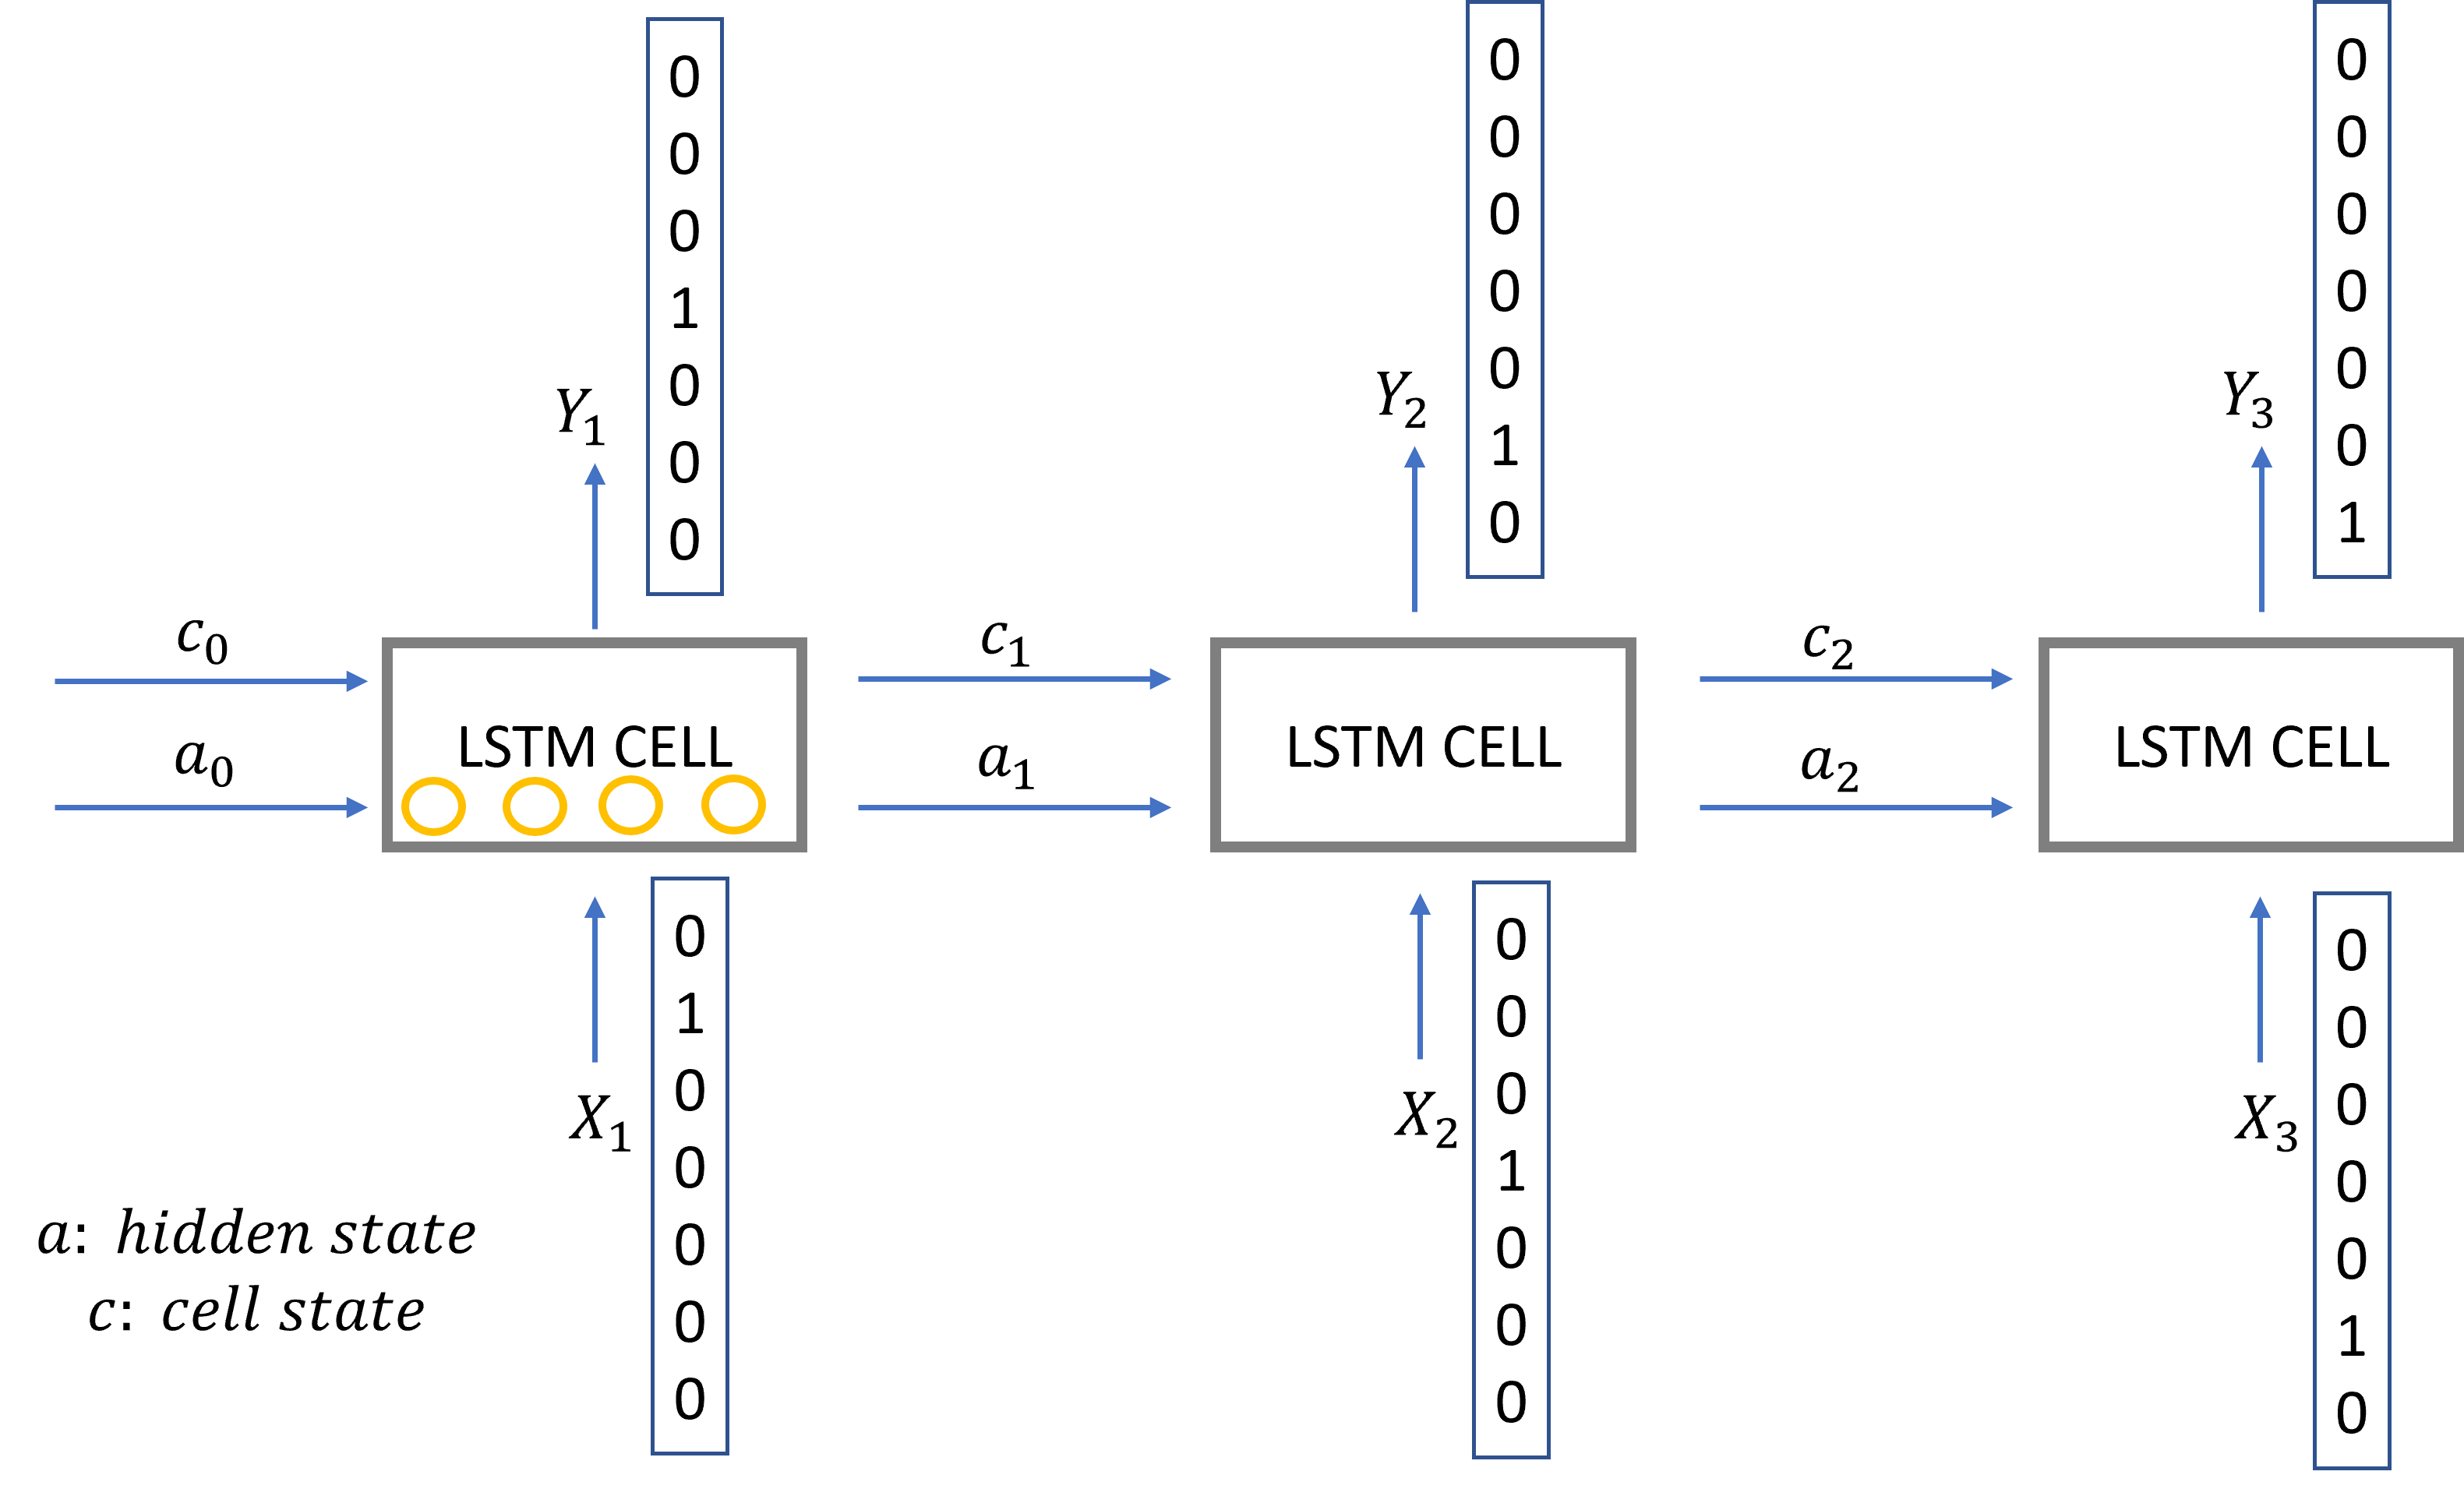

In [77]:
x1="s   r   g   m   |   p   d   |   n   S   || S   n   d   p   |   m   g   |   r   s   ||"
x2="s   r   s   r   |   s   r   |   g   m   || s   r   g   m   |   p   d   |   n   S   || S   n   S   n   |   S   n   |   d   p   || S   n   d   p   |   m   g   |   r   s   ||"
x3="s   r   g   s   |   r   g   |   s   r   || s   r   g   m   |   p   d   |   n   S   || S   n   d   s   |   n   d   |   s   n   || S   n   d   p   |   m   g   |   r   s   ||"
x4="s   r   g   m   |   s   r   |   g   m   || s   r   g   m   |   p   d   |   n   s   || S   n   d   p   |   S   n   |   d   p   || S   n   d   p   |   m   g   |   r   s   ||"
x5="s   r   g   m   |   p   ,   |   s   r   || s   r   g   m   |   p   d   |   n   S   || S   n   d   p   |   m   ,   |   S   n   || S   n   d   p   |   m   g   |   r   s   ||"
x6="s   r   g   m   |   p   d   |   s   r   || s   r   g   m   |   p   d   |   n   S   || S   n   d   p   |   m   g   |   S   n   || S   n   d   p   |   m   g   |   r   s   ||"
x7="s   r   g   m   |   p   d   |   n   ,   || s   r   g   m   |   p   d   |   n   S   || S   n   d   p   |   m   g   |   r   ,   || S   n   d   p   |   m   g   |   r   s   ||"
x8="s   r   g   m   |   p   m   |   g   r   || s   r   g   m   |   p   d   |   n   S   || S   n   d   p   |   m   p   |   d   n   || S   n   d   p   |   m   g   |   r   s   ||"
x9="s   r   g   m   |   p   m   |   d   p   || s   r   g   m   |   p   d   |   n   S   || S   n   d   p   |   m   p   |   g   m   || S   n   d   p   |   m   g   |   r   s   ||"

x10="s   r   g   m   |   p   ,   |   g   m   || p   ,   ,   ,   |   p   ,   |   ,   ,   || g   m   p   d   |   n   d   |   p   m   || g   m   p   g   |   m   g   |   r   s   ||"
x11="S   ,   n   d   |   n   ,   |   d   p   || d   ,   p   m   |   p   ,   |   p   ,   || g   m   p   d   |   n   d   |   p   m   || g   m   p   g   |   m   g   |   r   s   ||"
x12="S   S   n   d   |   n   n   |   d   p   || d   d   p   m   |   p   ,   |   p   ,   || g   m   p   d   |   n   d   |   p   m   || g   m   p   g   |   m   g   |   r   s   ||"
x13="s   r   g   r   |   g   ,   |   g   m   || p   m   p   ,   |   d   p   |   d   ,   || m   p   d   p   |   d   n   |   d   p   || m   p   d   p   |   m   g   |   r   s   ||"
x14="s   r   g   m   |   p   ,   |   p   ,   || d   d   p   ,   |   m   m   |   p   ,   || d   n   S   ,   |   S   n   |   d   p   || S   n   d   p   |   m   g   |   r   s   ||"


In [78]:
l1=[]
l1.append([i for i in x2.split(" ") if i])
l1.append([i for i in x3.split(" ") if i])
l1.append([i for i in x4.split(" ") if i])
l1.append([i for i in x5.split(" ") if i])
l1.append([i for i in x6.split(" ") if i])
l1.append([i for i in x7.split(" ") if i])
l1.append([i for i in x8.split(" ") if i])
l1.append([i for i in x9.split(" ") if i])
l1.append([i for i in x10.split(" ") if i])
l1.append([i for i in x11.split(" ") if i])
l1.append([i for i in x12.split(" ") if i])
l1.append([i for i in x13.split(" ") if i])
l1.append([i for i in x14.split(" ") if i])

In [79]:
import pandas as pd

In [80]:
lo=np.array(l1)

In [81]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = l1[3]
values = array(data)
print(values)
# integer encode
#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(values.reshape(len(values), 1))
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[20, :])])
print(inverted)

['s' 'r' 'g' 'm' '|' 'p' ',' '|' 's' 'r' '||' 's' 'r' 'g' 'm' '|' 'p' 'd'
 '|' 'n' 'S' '||' 'S' 'n' 'd' 'p' '|' 'm' ',' '|' 'S' 'n' '||' 'S' 'n' 'd'
 'p' '|' 'm' 'g' '|' 'r' 's' '||']
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0

In [82]:
onehot_encoded.shape

(44, 11)

In [100]:
X=np.zeros([13,44,11])
X.shape

Y=np.zeros([44,13,11])
X.shape,Y.shape

((13, 44, 11), (44, 13, 11))

In [203]:
for i in range(0,len(l1)):
    values = array(l1[i])
    onehot_encoded = onehot_encoder.transform(values.reshape(len(values), 1))
    X[i,:]=onehot_encoded
    
    values=np.roll(values,-1)
    onehot_encoded = onehot_encoder.transform(values.reshape(len(values), 1))
    Y[:,i,:]=onehot_encoded


    

You have just loaded the following:

- `X`: This is an (m, $T_x$, 90) dimensional array. 
    - You have m training examples, each of which is a snippet of $T_x =30$ musical values. 
    - At each time step, the input is one of 90 different possible values, represented as a one-hot vector. 
        - For example, X[i,t,:] is a one-hot vector representing the value of the i-th example at time t. 

- `Y`: a $(T_y, m, 90)$ dimensional array
    - This is essentially the same as `X`, but shifted one step to the left (to the past). 
    - Notice that the data in `Y` is **reordered** to be dimension $(T_y, m, 90)$, where $T_y = T_x$. This format makes it more convenient to feed into the LSTM later.
    - Similar to the dinosaur assignment, you're using the previous values to predict the next value.
        - So your sequence model will try to predict $y^{\langle t \rangle}$ given $x^{\langle 1\rangle}, \ldots, x^{\langle t \rangle}$. 

- `n_values`: The number of unique values in this dataset. This should be 90. 

- `indices_values`: python dictionary mapping integers 0 through 89 to musical values.

- `chords`: Chords used in the input midi

In [205]:
# number of dimensions for the hidden state of each LSTM cell.
n_a = 64 

#### Sequence generation uses a for-loop
* If you're building an RNN where, at test time, the entire input sequence $x^{\langle 1 \rangle}, x^{\langle 2 \rangle}, \ldots, x^{\langle T_x \rangle}$ is given in advance, then Keras has simple built-in functions to build the model. 
* However, for **sequence generation, at test time you won't know all the values of $x^{\langle t\rangle}$ in advance**.
* Instead, you'll generate them one at a time using $x^{\langle t\rangle} = y^{\langle t-1 \rangle}$. 
    * The input at time "t" is the prediction at the previous time step "t-1".
* So you'll need to implement your own for-loop to iterate over the time steps. 

#### Shareable weights
* The function `djmodel()` will call the LSTM layer $T_x$ times using a for-loop.
* It is important that all $T_x$ copies have the same weights. 
    - The $T_x$ steps should have shared weights that aren't re-initialized.
* Referencing a globally defined shared layer will utilize the same layer-object instance at each time step.
* The key steps for implementing layers with shareable weights in Keras are: 
1. Define the layer objects (you'll use global variables for this).
2. Call these objects when propagating the input.

#### 3 types of layers
* The layer objects you need for global variables have been defined.  
    * Just run the next cell to create them! 
* Please read the Keras documentation and understand these layers: 
    - [Reshape()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Reshape): Reshapes an output to a certain shape.
    - [LSTM()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM): Long Short-Term Memory layer
    - [Dense()](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense): A regular fully-connected neural network layer.

In [206]:
n_values = 11 # number of music values
reshaper = Reshape((1, n_values))                  # Used in Step 2.B of djmodel(), below
LSTM_cell = LSTM(n_a, return_state = True)         # Used in Step 2.C
densor = Dense(n_values, activation='softmax')     # Used in Step 2.D

* `reshaper`, `LSTM_cell` and `densor` are globally defined layer objects that you'll use to implement `djmodel()`. 
* In order to propagate a Keras tensor object X through one of these layers, use `layer_object()`.
    - For one input, use `layer_object(X)`
    - For more than one input, put the inputs in a list: `layer_object([X1,X2])`

#### Step 2: Loop through time steps
* Loop for $t \in 1, \ldots, T_x$:

#### 2A. Select the 't' time-step vector from `X`.
* X has the shape (m, Tx, n_values).
* The shape of the 't' selection should be (n_values,). 
* Recall that if you were implementing in numpy instead of Keras, you would extract a slice from a 3D numpy array like this:
```Python
var1 = array1[:,1,:]
```
    
#### 2B. Reshape `x` to be (1, n_values).
* Use the `reshaper()` layer.  This is a function that takes the previous layer as its input argument.

#### 2C. Run `x` through one step of `LSTM_cell`.

* Initialize the `LSTM_cell` with the previous step's hidden state $a$ and cell state $c$. 
* Use the following formatting:
```python
next_hidden_state, _, next_cell_state = LSTM_cell(inputs=input_x, initial_state=[previous_hidden_state, previous_cell_state])
```
    * Choose appropriate variables for inputs, hidden state and cell state.

#### 2D. Dense layer
* Propagate the LSTM's hidden state through a dense+softmax layer using `densor`. 
    
#### 2E. Append output
* Append the output to the list of "outputs".

#### Step 3: After the loop, create the model
* Use the Keras `Model` object to create a model. There are two ways to instantiate the `Model` object. One is by subclassing, which you won't use here. Instead, you'll use the highly flexible Functional API, which you may remember from an earlier assignment in this course! With the Functional API, you'll start from your Input, then specify the model's forward pass with chained layer calls, and finally create the model from inputs and outputs.

* Specify the inputs and output like so:
```Python
model = Model(inputs=[input_x, initial_hidden_state, initial_cell_state], outputs=the_outputs)
```
    * Then, choose the appropriate variables for the input tensor, hidden state, cell state, and output.
* See the documentation for [Model](https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [207]:
def djmodel(Tx, LSTM_cell, densor, reshaper):
    """
    Implement the djmodel composed of Tx LSTM cells where each cell is responsible
    for learning the following note based on the previous note and context.
    Each cell has the following schema: 
            [X_{t}, a_{t-1}, c0_{t-1}] -> RESHAPE() -> LSTM() -> DENSE()
    Arguments:
        Tx -- length of the sequences in the corpus
        LSTM_cell -- LSTM layer instance
        densor -- Dense layer instance
        reshaper -- Reshape layer instance
    
    Returns:
        model -- a keras instance model with inputs [X, a0, c0]
    """
    # Get the shape of input values
    n_values = densor.units
    
    # Get the number of the hidden state vector
    n_a = LSTM_cell.units
    
    # Define the input layer and specify the shape
    X = Input(shape=(Tx, n_values)) 
    
    # Define the initial hidden state a0 and initial cell state c0
    # using `Input`
    a0 = Input(shape=(n_a,), name='a0')
    c0 = Input(shape=(n_a,), name='c0')
    a = a0
    c = c0
    ### START CODE HERE ### 
    # Step 1: Create empty list to append the outputs while you iterate (≈1 line)
    outputs = []
    
    # Step 2: Loop over tx
    for t in range(Tx):
        
        # Step 2.A: select the "t"th time step vector from X. 
        x = X[:,t,:]
        # Step 2.B: Use reshaper to reshape x to be (1, n_values) (≈1 line)
        x = reshaper(x)
        #print(x.shape)
        # Step 2.C: Perform one step of the LSTM_cell
        a, _, c = LSTM_cell(inputs=x, initial_state=[a,c])
        # Step 2.D: Apply densor to the hidden state output of LSTM_Cell
        out = densor(a)
        # Step 2.E: add the output to "outputs"
        outputs=outputs+[out]
        
    # Step 3: Create model instance
    model = Model(inputs=[X, a0, c0], outputs=outputs)
    
    
    return model

#### Create the model object
* Run the following cell to define your model. 
* We will use `Tx=30`. 
* This cell may take a few seconds to run. 

In [304]:
model = djmodel(Tx=44, LSTM_cell=LSTM_cell, densor=densor, reshaper=reshaper)

#### Compile the model for training
* You now need to compile your model to be trained. 
* We will use:
    - optimizer: Adam optimizer
    - Loss function: categorical cross-entropy (for multi-class classification)

In [305]:
opt = Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, decay=0.01)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#### Initialize hidden state and cell state
Finally, let's initialize `a0` and `c0` for the LSTM's initial state to be zero. 

In [306]:
m = 13
a0 = np.zeros((m, n_a))
c0 = np.zeros((m, n_a))

In [307]:
history = model.fit([X, a0, c0], list(Y), epochs=200, verbose = 1)

(13, 64)

loss at epoch 1: 105.28192901611328
loss at epoch 100: 2.927065372467041


Text(0, 0.5, 'loss')

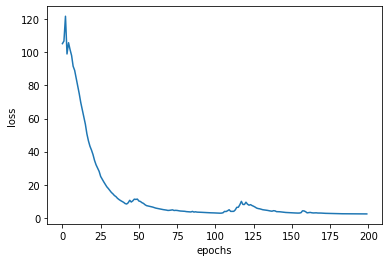

In [384]:
print(f"loss at epoch 1: {history.history['loss'][0]}")
print(f"loss at epoch 100: {history.history['loss'][99]}")
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

In [310]:
X.shape

(13, 44, 11)

At each step of sampling, you will:
* Take as input the activation '`a`' and cell state '`c`' from the previous state of the LSTM.
* Forward propagate by one step.
* Get a new output activation, as well as cell state. 
* The new activation '`a`' can then be used to generate the output using the fully connected layer, `densor`. 

#### Initialization
* You'll initialize the following to be zeros:
    * `x0` 
    * hidden state `a0` 
    * cell state `c0` 

<a name='ex-2'></a>
### Exercise 2 - music_inference_model

Implement `music_inference_model()` to sample a sequence of musical values.

Here are some of the key steps you'll need to implement inside the for-loop that generates the $T_y$ output characters: 

**Step 1**: Create an empty list "outputs" to save the outputs of the LSTM Cell at every time step.

**Step 2.A**: Use `LSTM_Cell`, which takes in the input layer, as well as the previous step's '`c`' and '`a`' to generate the current step's '`c`' and '`a`'. 

```Python
next_hidden_state, _, next_cell_state = LSTM_cell(input_x, initial_state=[previous_hidden_state, previous_cell_state])
```
   - Choose the appropriate variables for `input_x`, `hidden_state`, and `cell_state`

**2.B**: Compute the output by applying `densor` to compute a softmax on '`a`' to get the output for the current step. 

**2.C**: Append the output to the list `outputs`.

**2.D**: Convert the last output into a new input for the next time step. You will do this in 2 substeps:
- Get the index of the maximum value of the predicted output using `tf.math.argmax` along the last axis.
- Convert the index into its n_values-one-hot encoding using `tf.one_hot`.

**2.E**: Use `RepeatVector(1)(x)` to convert the output of the one-hot enconding with shape=(None, 90) into a tensor with shape=(None, 1, 90)

#### Step 3: Inference Model:  
This is how to use the Keras `Model` object:

```Python
model = Model(inputs=[input_x, initial_hidden_state, initial_cell_state], outputs=the_outputs)
```

* Choose the appropriate variables for the input tensor, hidden state, cell state, and output.

**Hint**: the inputs to the model are the **initial** inputs and states.

In [312]:


def music_inference_model(LSTM_cell, densor, Ty=44):
    """
    Uses the trained "LSTM_cell" and "densor" from model() to generate a sequence of values.
    
    Arguments:
    LSTM_cell -- the trained "LSTM_cell" from model(), Keras layer object
    densor -- the trained "densor" from model(), Keras layer object
    Ty -- integer, number of time steps to generate
    
    Returns:
    inference_model -- Keras model instance
    """
    
    # Get the shape of input values
    n_values = densor.units
    # Get the number of the hidden state vector
    n_a = LSTM_cell.units
    
    # Define the input of your model with a shape 
    x0 = Input(shape=(1, n_values))
    
    
    # Define s0, initial hidden state for the decoder LSTM
    a0 = Input(shape=(n_a,), name='a0')
    c0 = Input(shape=(n_a,), name='c0')
    a = a0
    c = c0
    x = x0

    ### START CODE HERE ###
    # Step 1: Create an empty list of "outputs" to later store your predicted values (≈1 line)
    outputs = []
    
    # Step 2: Loop over Ty and generate a value at every time step
    for t in range(Ty):
        # Step 2.A: Perform one step of LSTM_cell. Use "x", not "x0" (≈1 line)
        a, _, c = LSTM_cell(x, initial_state=[a,c])
        
        # Step 2.B: Apply Dense layer to the hidden state output of the LSTM_cell (≈1 line)
        out = densor(a)
        # Step 2.C: Append the prediction "out" to "outputs". out.shape = (None, 90) (≈1 line)
        outputs.append(out)
        #print(out.shape)
 
        # Step 2.D: 
        # Select the next value according to "out",
        # Set "x" to be the one-hot representation of the selected value
        # See instructions above.
        x = tf.math.argmax(out,axis=-1)
        #print(x.shape)
        x = tf.one_hot(x,n_values)
        # Step 2.E: 
        # Use RepeatVector(1) to convert x into a tensor with shape=(None, 1, 90)
        #print(x.shape)
        x = RepeatVector(1)(x)
        
    # Step 3: Create model instance with the correct "inputs" and "outputs" (≈1 line)
    inference_model = Model(inputs=[x0, a0, c0], outputs=outputs)
    
    
    return inference_model

Run the cell below to define your inference model. This model is hard coded to generate 50 values.

In [313]:
inference_model = music_inference_model(LSTM_cell, densor, Ty = 44)

#### Initialize inference model
The following code creates the zero-valued vectors you will use to initialize `x` and the LSTM state variables `a` and `c`. 

In [314]:
x_initializer.shape

(1, 1, 11)

In [315]:
# x_initializer = np.zeros((1, 1, n_values))
# a_initializer = np.zeros((1, n_a))
# c_initializer = np.zeros((1, n_a))

In [376]:
x_initializer = np.random.rand(1, 1, n_values)
a_initializer = np.random.rand(1, n_a)
c_initializer = np.random.rand(1, n_a)

In [377]:
#x_initializer[0, 0, :]=[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]

In [378]:
label_encoder.inverse_transform([argmax(x_initializer[0, 0, :])])

array(['d'], dtype='<U2')

In [379]:


def predict_and_sample(inference_model, x_initializer = x_initializer, a_initializer = a_initializer, 
                       c_initializer = c_initializer):
    """
    Predicts the next value of values using the inference model.
    
    Arguments:
    inference_model -- Keras model instance for inference time
    x_initializer -- numpy array of shape (1, 1, 90), one-hot vector initializing the values generation
    a_initializer -- numpy array of shape (1, n_a), initializing the hidden state of the LSTM_cell
    c_initializer -- numpy array of shape (1, n_a), initializing the cell state of the LSTM_cel
    
    Returns:
    results -- numpy-array of shape (Ty, 90), matrix of one-hot vectors representing the values generated
    indices -- numpy-array of shape (Ty, 1), matrix of indices representing the values generated
    """
    
    n_values = x_initializer.shape[2]
    
    ### START CODE HERE ###
    # Step 1: Use your inference model to predict an output sequence given x_initializer, a_initializer and c_initializer.
    pred = inference_model.predict([x_initializer,a_initializer,c_initializer])
    # Step 2: Convert "pred" into an np.array() of indices with the maximum probabilities
    indices = np.argmax(pred,axis=-1)
    # Step 3: Convert indices to one-hot vectors, the shape of the results should be (Ty, n_values)
    results = to_categorical(indices, num_classes=n_values)
    ### END CODE HERE ###
    
    return results, indices

In [387]:
results, indices = predict_and_sample(inference_model, x_initializer, a_initializer, c_initializer)

In [381]:
results.shape

(44, 11)

In [382]:
notes=[]
for i in range(0,len(results[:,0])):
    inverted = label_encoder.inverse_transform([argmax(results[i, :])])[0]
    notes.append(inverted)

In [386]:
print(' '.join(e for e in notes))

d | n S | d p || d d p m | p , | p , || g m p d | n d | p m || g m p g | m g | r s || S n d
